In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

- **`import cv2`**: Imports the OpenCV library, which is used for computer vision tasks and image processing.
- **`import numpy as np`**: Imports the NumPy library, essential for numerical computations and handling arrays.
- **`import matplotlib.pyplot as plt`**: Imports the Matplotlib library's plotting module for creating visualizations.
- **`from zipfile import ZipFile`**: Allows working with ZIP files, including extracting and creating ZIP archives.
- **`from urllib.request import urlretrieve`**: Enables downloading files from the internet using a specified URL.
- **`from IPython.display import Image`**: Allows displaying images in Jupyter notebooks.
- **`%matplotlib inline`**: A Jupyter magic command that enables inline plotting, displaying Matplotlib plots directly below the code cells.


In [4]:
def download_and_unzip(url, save_path):
    print("Download initiated", end="")

    #Download the zip file
    urlretrieve(url, save_path)

    #Extract Zip file
    try:
        with ZipFile(save_path) as z:
            #extractall() specifies the directory where the files will be extracted.
            z.extractall(os.path.split(save_path)[0])            
            print("Done")
    except Exception as e:
        print("\n Invalid file")

-> If `save_path` is `"cwd/opencv_bootcamp_assets_NB1.zip"`, `os.path.split(save_path)` would return `("cwd", "opencv_bootcamp_assets_NB1.zip")` as a tuple.

-> `[0]` accesses the directory path `"cwd"`.


In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"
#os.getcwd() returns pwd as a string
#This is joined os.path.join with the text to form /cwd/opencv...
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

#check if path exists
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [6]:
'''
Lesson 1
Reading and Displaying Images
'''
Image(filename="checkerboard_18x18.png")

#### Reading Images using OpenCV

-> We use `cv2.imread()`

-> `retval = cv2.imread(filename, flags)` ::: `filename` is a mandatory argument; `flags` is `1` by default.

##### Flags: 
1. `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode
2. `cv2.IMREAD_COLOR` or `1`: Loads a color image. Any transparency of the image will be neglected. It is the default flag.
3. `cv2.IMREAD_UNCHANGED` or `-1`: Loads the image as is, including the alpha channel.

###### Examples:
1. `retval = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)` 
2. `retval = cv2.imread("image.png", 0)`


In [14]:
retval = cv2.imread("checkerboard_18x18.png",0)
print(retval)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [28]:
'''Display Image Attributes'''
print(f"Image dimensions (H, W) is :{retval.shape}")
print(f"Image data type is :{retval.dtype}")

Image dimensions (H, W, C) is :(18, 18)
Image data type is :uint8


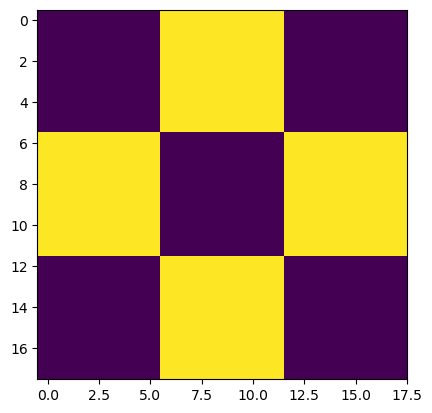

In [20]:
'''Display Image using MatPlotLib'''
plt.imshow(retval)
plt.show() #image wont show without this, only address

Even though the image was read in as a grayscale image, 

`retval = cv2.imread("checkerboard_18x18.png", 0)` 
(0 for grayscale) 

it won't necessarily display in grayscale when using `imshow()`.

##### Note:
- Matplotlib uses different color maps, and it's possible that the grayscale color map is not set.

-> To display grayscale using `matplotlib.pyplot`, use `cmap='gray'`.


In [ ]:
retval_fuzzy = cv2.imread('checkerboard_fuzzy_18x18.jpg', 0)
print(retval_fuzzy)
plt.imshow(retval_fuzzy, cmap='gray')
plt.show()

In [ ]:
'''
Lesson 2:
Handling Channels
'''
Image(filename='coca-cola-logo.png')

#### Channels refers to the number of color channels in the image:

- **1 Channel**: Grayscale images (black and white) have a single channel.
- **3 Channels**: RGB (Red, Green, Blue) images have three channels, where each channel represents the intensity of the respective color at each pixel.
- **4 Channels**: RGBA images have four channels, adding an alpha channel for transparency.

##### Example:
```python
print("Image size (H, W, C) is:", coke_img.shape)


In [29]:
'''Read and Display Color'''
retval_coke = cv2.imread('coca-cola-logo.png', 1)
print(f"Image Dimensions: {retval_coke.shape}")
print(f'image DataType: {retval_coke.dtype}')


Image Dimensions: (700, 700, 3)
image DataType: uint8


In [ ]:
plt.imshow(retval_coke) #This displays a blue coke instead of red.

#### This displays a blue coke instead of red.
This is because Matplotlib expects the image in RGB format, whereas OpenCV stores images in BGR format.

To convert BGR to RGB, you can use:
1. Numpy slicing: `[:, :, ::-1]`

2. OpenCV function: `cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)`


In [ ]:
'''Reversing BGR to RBG'''
retval_coke_Numpy_Slicing = retval_coke[:, :, ::-1]
retval_coke_OpenCV_Func = cv2.cvtColor(retval_coke, cv2.COLOR_BGR2RGB)
#Both should return the same thing.
plt.imshow(retval_coke_Numpy_Slicing)
plt.show()